In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_az=df.loc[df.State=="AZ"]
df_az=df_az.drop(columns=["FIPS"])
df_az=df_az.drop(columns=["State"])

In [3]:
df_az_groups=df_az.groupby(["Year"]).mean()
df_az_groups

,DSCI
Year,
2000,81.752564
2001,1.189744
2002,288.491824
2003,291.393590
2004,285.102564
2005,101.685897
2006,264.147436
2007,228.202564
2008,58.417610


In [4]:
df_az_groups.reset_index()

,Year,DSCI
0,2000,81.752564
1,2001,1.189744
2,2002,288.491824
3,2003,291.393590
4,2004,285.102564
5,2005,101.685897
6,2006,264.147436
7,2007,228.202564
8,2008,58.417610
9,2009,117.512821


In [5]:
df_az_groups=df_az_groups.rename(columns={"DSCI":"DSCI AZ"})
df_az_groups.reset_index()

,Year,DSCI AZ
0,2000,81.752564
1,2001,1.189744
2,2002,288.491824
3,2003,291.393590
4,2004,285.102564
5,2005,101.685897
6,2006,264.147436
7,2007,228.202564
8,2008,58.417610
9,2009,117.512821


In [6]:
df_ca=df.loc[df.State=="CA"]
df_ca=df_ca.drop(columns=["FIPS"])
df_ca=df_ca.drop(columns=["State"])

In [7]:
df_ca_groups=df_ca.groupby(["Year"]).mean()

In [8]:
df_ca_groups.reset_index()

,Year,DSCI
0,2000,36.544872
1,2001,1.326923
2,2002,285.232704
3,2003,214.788462
4,2004,204.967949
5,2005,7.801282
6,2006,66.141026
7,2007,364.634615
8,2008,213.283019
9,2009,147.775641


In [9]:
df_ca_groups=df_ca_groups.rename(columns={"DSCI":"DSCI CA"})
df_ca_groups.reset_index()

,Year,DSCI CA
0,2000,36.544872
1,2001,1.326923
2,2002,285.232704
3,2003,214.788462
4,2004,204.967949
5,2005,7.801282
6,2006,66.141026
7,2007,364.634615
8,2008,213.283019
9,2009,147.775641


In [10]:
df_co=df.loc[df.State=="CO"]
df_co=df_co.drop(columns=["FIPS"])
df_co=df_co.drop(columns=["State"])

In [11]:
df_co_groups=df_co.groupby(["Year"]).mean()

In [12]:
df_co_groups.reset_index()

,Year,DSCI
0,2000,58.170330
1,2001,23.210623
2,2002,344.516622
3,2003,342.357143
4,2004,206.083333
5,2005,56.645604
6,2006,95.032051
7,2007,61.685897
8,2008,16.552561
9,2009,44.059524


In [13]:
df_co_groups=df_co_groups.rename(columns={"DSCI":"DSCI CO"})
df_co_groups.reset_index()

,Year,DSCI CO
0,2000,58.170330
1,2001,23.210623
2,2002,344.516622
3,2003,342.357143
4,2004,206.083333
5,2005,56.645604
6,2006,95.032051
7,2007,61.685897
8,2008,16.552561
9,2009,44.059524


In [14]:
df_nv=df.loc[df.State=="NV"]
df_nv=df_nv.drop(columns=["FIPS"])
df_nv=df_nv.drop(columns=["State"])

In [15]:
df_nv_groups=df_nv.groupby(["Year"]).mean()

In [16]:
df_nv_groups.reset_index()

,Year,DSCI
0,2000,34.259615
1,2001,64.538462
2,2002,259.820755
3,2003,359.225962
4,2004,318.788462
5,2005,34.769231
6,2006,19.865385
7,2007,230.028846
8,2008,221.721698
9,2009,143.514423


In [17]:
df_nv_groups=df_nv_groups.rename(columns={"DSCI":"DSCI NV"})
df_nv_groups.reset_index()

,Year,DSCI NV
0,2000,34.259615
1,2001,64.538462
2,2002,259.820755
3,2003,359.225962
4,2004,318.788462
5,2005,34.769231
6,2006,19.865385
7,2007,230.028846
8,2008,221.721698
9,2009,143.514423


In [18]:
df_nm=df.loc[df.State=="NM"]
df_nm=df_nm.drop(columns=["FIPS"])
df_nm=df_nm.drop(columns=["State"])

In [19]:
df_nm_groups=df_nm.groupby(["Year"]).mean()

In [20]:
df_nm_groups.reset_index()

,Year,DSCI
0,2000,98.403846
1,2001,11.703297
2,2002,282.059299
3,2003,299.662088
4,2004,324.585165
5,2005,149.587912
6,2006,221.991758
7,2007,78.137363
8,2008,38.479784
9,2009,48.736264


In [21]:
df_nm_groups=df_nm_groups.rename(columns={"DSCI":"DSCI NM"})
df_nm_groups.reset_index()

,Year,DSCI NM
0,2000,98.403846
1,2001,11.703297
2,2002,282.059299
3,2003,299.662088
4,2004,324.585165
5,2005,149.587912
6,2006,221.991758
7,2007,78.137363
8,2008,38.479784
9,2009,48.736264


In [22]:
df_ut=df.loc[df.State=="UT"]
df_ut=df_ut.drop(columns=["FIPS"])
df_ut=df_ut.drop(columns=["State"])

In [23]:
df_ut_groups=df_ut.groupby(["Year"]).mean()

In [24]:
df_ut_groups.reset_index()

,Year,DSCI
0,2000,67.390533
1,2001,44.437870
2,2002,304.898403
3,2003,405.809172
4,2004,353.007396
5,2005,71.143491
6,2006,32.096154
7,2007,196.331361
8,2008,55.104499
9,2009,39.102071


In [25]:
df_ut_groups=df_ut_groups.rename(columns={"DSCI":"DSCI UT"})
df_ut_groups.reset_index()

,Year,DSCI UT
0,2000,67.390533
1,2001,44.437870
2,2002,304.898403
3,2003,405.809172
4,2004,353.007396
5,2005,71.143491
6,2006,32.096154
7,2007,196.331361
8,2008,55.104499
9,2009,39.102071


In [26]:
df_wy=df.loc[df.State=="WY"]
df_wy=df_wy.drop(columns=["FIPS"])
df_wy=df_wy.drop(columns=["State"])

In [27]:
df_wy_groups=df_wy.groupby(["Year"]).mean()

In [28]:
df_wy_groups.reset_index()

,Year,DSCI
0,2000,85.370192
1,2001,202.610577
2,2002,366.018868
3,2003,414.173077
4,2004,323.288462
5,2005,172.908654
6,2006,123.201923
7,2007,297.524038
8,2008,217.495283
9,2009,60.692308


In [29]:
df_wy_groups=df_wy_groups.rename(columns={"DSCI":"DSCI WY"})
df_wy_groups.reset_index()

,Year,DSCI WY
0,2000,85.370192
1,2001,202.610577
2,2002,366.018868
3,2003,414.173077
4,2004,323.288462
5,2005,172.908654
6,2006,123.201923
7,2007,297.524038
8,2008,217.495283
9,2009,60.692308


In [30]:
print (df_wy_groups.dtypes)

DSCI WY    float64
dtype: object


In [31]:
result= df_az_groups.merge(df_ca_groups,on="Year").merge(df_co_groups,on="Year").merge(df_nm_groups,on="Year").merge(df_nv_groups,on="Year").merge(df_ut_groups,on="Year").merge(df_wy_groups,on="Year")
result

,DSCI AZ,DSCI CA,DSCI CO,DSCI NM,DSCI NV,DSCI UT,DSCI WY
Year,,,,,,,
2000,81.752564,36.544872,58.170330,98.403846,34.259615,67.390533,85.370192
2001,1.189744,1.326923,23.210623,11.703297,64.538462,44.437870,202.610577
2002,288.491824,285.232704,344.516622,282.059299,259.820755,304.898403,366.018868
2003,291.393590,214.788462,342.357143,299.662088,359.225962,405.809172,414.173077
2004,285.102564,204.967949,206.083333,324.585165,318.788462,353.007396,323.288462
2005,101.685897,7.801282,56.645604,149.587912,34.769231,71.143491,172.908654
2006,264.147436,66.141026,95.032051,221.991758,19.865385,32.096154,123.201923
2007,228.202564,364.634615,61.685897,78.137363,230.028846,196.331361,297.524038
2008,58.417610,213.283019,16.552561,38.479784,221.721698,55.104499,217.495283


In [32]:
for col in result:
    print(col,' ',type(col))

DSCI AZ   <class 'str'>
DSCI CA   <class 'str'>
DSCI CO   <class 'str'>
DSCI NM   <class 'str'>
DSCI NV   <class 'str'>
DSCI UT   <class 'str'>
DSCI WY   <class 'str'>


In [33]:
result = pd.concat([df_az_groups, df_ca_groups,df_co_groups,df_nm_groups,df_nv_groups,df_ut_groups,df_wy_groups], axis=1, join="inner")
result.reset_index()

,Year,DSCI AZ,DSCI CA,DSCI CO,DSCI NM,DSCI NV,DSCI UT,DSCI WY
0,2000,81.752564,36.544872,58.170330,98.403846,34.259615,67.390533,85.370192
1,2001,1.189744,1.326923,23.210623,11.703297,64.538462,44.437870,202.610577
2,2002,288.491824,285.232704,344.516622,282.059299,259.820755,304.898403,366.018868
3,2003,291.393590,214.788462,342.357143,299.662088,359.225962,405.809172,414.173077
4,2004,285.102564,204.967949,206.083333,324.585165,318.788462,353.007396,323.288462
5,2005,101.685897,7.801282,56.645604,149.587912,34.769231,71.143491,172.908654
6,2006,264.147436,66.141026,95.032051,221.991758,19.865385,32.096154,123.201923
7,2007,228.202564,364.634615,61.685897,78.137363,230.028846,196.331361,297.524038
8,2008,58.417610,213.283019,16.552561,38.479784,221.721698,55.104499,217.495283
9,2009,117.512821,147.775641,44.059524,48.736264,143.514423,39.102071,60.692308


In [34]:
for col in result:
    print(col,' ',type(col))

DSCI AZ   <class 'str'>
DSCI CA   <class 'str'>
DSCI CO   <class 'str'>
DSCI NM   <class 'str'>
DSCI NV   <class 'str'>
DSCI UT   <class 'str'>
DSCI WY   <class 'str'>


In [35]:
#result["Mean"]=df.iloc[:,[0,1,2,3,4,5,6]].mean(axis=1)
result['mean'] = result.mean(axis=1,numeric_only=True)
#df[column_list].loc[row_index_list].mean(axis=0)
#result["Fred"]=result[["DSCI AZ","DSCI CA","DSCI CO","DSCI NM","DSCI NV","DSCI UT","DSCI WY"]].sum()
result.reset_index()


,Year,DSCI AZ,DSCI CA,DSCI CO,DSCI NM,DSCI NV,DSCI UT,DSCI WY,mean
0,2000,81.752564,36.544872,58.170330,98.403846,34.259615,67.390533,85.370192,65.984565
1,2001,1.189744,1.326923,23.210623,11.703297,64.538462,44.437870,202.610577,49.859642
2,2002,288.491824,285.232704,344.516622,282.059299,259.820755,304.898403,366.018868,304.434068
3,2003,291.393590,214.788462,342.357143,299.662088,359.225962,405.809172,414.173077,332.487070
4,2004,285.102564,204.967949,206.083333,324.585165,318.788462,353.007396,323.288462,287.974762
5,2005,101.685897,7.801282,56.645604,149.587912,34.769231,71.143491,172.908654,84.934582
6,2006,264.147436,66.141026,95.032051,221.991758,19.865385,32.096154,123.201923,117.496533
7,2007,228.202564,364.634615,61.685897,78.137363,230.028846,196.331361,297.524038,208.077812
8,2008,58.417610,213.283019,16.552561,38.479784,221.721698,55.104499,217.495283,117.293493
9,2009,117.512821,147.775641,44.059524,48.736264,143.514423,39.102071,60.692308,85.913293


In [36]:
#cols = result.columns.drop('Year')
result[["DSCI AZ","DSCI CA","DSCI CO","DSCI NM","DSCI NV","DSCI UT","DSCI WY"]] = result[["DSCI AZ","DSCI CA","DSCI CO","DSCI NM","DSCI NV","DSCI UT","DSCI WY"]].apply(pd.to_numeric, errors='coerce')
result

,DSCI AZ,DSCI CA,DSCI CO,DSCI NM,DSCI NV,DSCI UT,DSCI WY,mean
Year,,,,,,,,
2000,81.752564,36.544872,58.170330,98.403846,34.259615,67.390533,85.370192,65.984565
2001,1.189744,1.326923,23.210623,11.703297,64.538462,44.437870,202.610577,49.859642
2002,288.491824,285.232704,344.516622,282.059299,259.820755,304.898403,366.018868,304.434068
2003,291.393590,214.788462,342.357143,299.662088,359.225962,405.809172,414.173077,332.487070
2004,285.102564,204.967949,206.083333,324.585165,318.788462,353.007396,323.288462,287.974762
2005,101.685897,7.801282,56.645604,149.587912,34.769231,71.143491,172.908654,84.934582
2006,264.147436,66.141026,95.032051,221.991758,19.865385,32.096154,123.201923,117.496533
2007,228.202564,364.634615,61.685897,78.137363,230.028846,196.331361,297.524038,208.077812
2008,58.417610,213.283019,16.552561,38.479784,221.721698,55.104499,217.495283,117.293493


In [37]:
#result['DSCI AZ'] = result['DSCI AZ'].astype(float)



In [38]:
for col in result:
    print(col,' ',type(col))

DSCI AZ   <class 'str'>
DSCI CA   <class 'str'>
DSCI CO   <class 'str'>
DSCI NM   <class 'str'>
DSCI NV   <class 'str'>
DSCI UT   <class 'str'>
DSCI WY   <class 'str'>
mean   <class 'str'>


In [39]:
#result["DSCI AZ"] = result["DSCI AZ"].apply(pd.to_numeric).dtypes


In [40]:
for col in result:
    print(col,' ',type(col))

DSCI AZ   <class 'str'>
DSCI CA   <class 'str'>
DSCI CO   <class 'str'>
DSCI NM   <class 'str'>
DSCI NV   <class 'str'>
DSCI UT   <class 'str'>
DSCI WY   <class 'str'>
mean   <class 'str'>


In [41]:
result.dtypes


DSCI AZ    float64
DSCI CA    float64
DSCI CO    float64
DSCI NM    float64
DSCI NV    float64
DSCI UT    float64
DSCI WY    float64
mean       float64
dtype: object

In [42]:
result["Fred"] = result["DSCI CA"] + result["DSCI NM"]+result["DSCI CO"]+result["DSCI NV"]+result["DSCI UT"]+result["DSCI WY"]+result["DSCI AZ"]
result["Fred2"] = (result["DSCI CA"] + result["DSCI NM"]+result["DSCI CO"]+result["DSCI NV"]+result["DSCI UT"]+result["DSCI WY"]+result["DSCI AZ"])/7

In [43]:
result

,DSCI AZ,DSCI CA,DSCI CO,DSCI NM,DSCI NV,DSCI UT,DSCI WY,mean,Fred,Fred2
Year,,,,,,,,,,
2000,81.752564,36.544872,58.170330,98.403846,34.259615,67.390533,85.370192,65.984565,461.891952,65.984565
2001,1.189744,1.326923,23.210623,11.703297,64.538462,44.437870,202.610577,49.859642,349.017494,49.859642
2002,288.491824,285.232704,344.516622,282.059299,259.820755,304.898403,366.018868,304.434068,2131.038475,304.434068
2003,291.393590,214.788462,342.357143,299.662088,359.225962,405.809172,414.173077,332.487070,2327.409492,332.487070
2004,285.102564,204.967949,206.083333,324.585165,318.788462,353.007396,323.288462,287.974762,2015.823331,287.974762
2005,101.685897,7.801282,56.645604,149.587912,34.769231,71.143491,172.908654,84.934582,594.542072,84.934582
2006,264.147436,66.141026,95.032051,221.991758,19.865385,32.096154,123.201923,117.496533,822.475733,117.496533
2007,228.202564,364.634615,61.685897,78.137363,230.028846,196.331361,297.524038,208.077812,1456.544685,208.077812
2008,58.417610,213.283019,16.552561,38.479784,221.721698,55.104499,217.495283,117.293493,821.054454,117.293493


In [44]:
file1= "../Correlation/percentageElevationChange.csv"

df1=pd.read_csv(file1)
df1

,Year,Blue Mesa Elevation Percentage,Flaming Gorge Elevation Percentage,Fontanelle Elevation Percentage,Lake Powell Elevation Percentage,Morrow Point Elevation Percentage,Navajo Elevation Percentage,Strawberry Elevation Percentage
0,1990,0.997095,0.997476,0.997519,0.983614,0.999172,0.996831,0.994332
1,1991,0.997825,0.998350,0.997300,0.982076,0.999216,0.998362,0.994407
2,1992,0.996306,0.998094,0.995779,0.980327,0.999047,0.999046,0.993879
3,1993,0.996959,0.998372,0.997343,0.986521,0.999290,0.998881,0.994022
4,1994,0.996735,0.997444,0.996628,0.989210,0.998885,0.998178,0.994415
5,1995,0.997115,0.997986,0.996780,0.992964,0.998654,0.998132,0.995494
6,1996,0.997008,0.998340,0.996701,0.995283,0.998774,0.995921,0.997228
7,1997,0.996453,0.998820,0.997475,0.995817,0.998746,0.997192,0.998743
8,1998,0.995947,0.998972,0.997450,0.996906,0.998846,0.997686,0.999410
9,1999,0.997273,0.998632,0.997434,0.997040,0.999046,0.998180,0.998966


In [45]:
df1.set_index("Year")

,Blue Mesa Elevation Percentage,Flaming Gorge Elevation Percentage,Fontanelle Elevation Percentage,Lake Powell Elevation Percentage,Morrow Point Elevation Percentage,Navajo Elevation Percentage,Strawberry Elevation Percentage
Year,,,,,,,
1990,0.997095,0.997476,0.997519,0.983614,0.999172,0.996831,0.994332
1991,0.997825,0.998350,0.997300,0.982076,0.999216,0.998362,0.994407
1992,0.996306,0.998094,0.995779,0.980327,0.999047,0.999046,0.993879
1993,0.996959,0.998372,0.997343,0.986521,0.999290,0.998881,0.994022
1994,0.996735,0.997444,0.996628,0.989210,0.998885,0.998178,0.994415
1995,0.997115,0.997986,0.996780,0.992964,0.998654,0.998132,0.995494
1996,0.997008,0.998340,0.996701,0.995283,0.998774,0.995921,0.997228
1997,0.996453,0.998820,0.997475,0.995817,0.998746,0.997192,0.998743
1998,0.995947,0.998972,0.997450,0.996906,0.998846,0.997686,0.999410


In [46]:
df1['mean'] = df1["Blue Mesa Elevation Percentage"] + df1["Flaming Gorge Elevation Percentage"]+df1["Fontanelle Elevation Percentage"]+df1["Lake Powell Elevation Percentage"]+df1["Morrow Point Elevation Percentage"]+df1["Navajo Elevation Percentage"]+df1["Strawberry Elevation Percentage"]
df1["Fred2"] = (df1["Blue Mesa Elevation Percentage"] + df1["Flaming Gorge Elevation Percentage"]+df1["Fontanelle Elevation Percentage"]+df1["Lake Powell Elevation Percentage"]+df1["Morrow Point Elevation Percentage"]+df1["Navajo Elevation Percentage"]+df1["Strawberry Elevation Percentage"])/7
df1 = df1.drop(index=[0,1,2,3,4,5,6,7,8,9])
df1

,Year,Blue Mesa Elevation Percentage,Flaming Gorge Elevation Percentage,Fontanelle Elevation Percentage,Lake Powell Elevation Percentage,Morrow Point Elevation Percentage,Navajo Elevation Percentage,Strawberry Elevation Percentage,mean,Fred2
10,2000,0.996215,0.997613,0.996433,0.994963,0.999009,0.997277,0.998719,6.980229,0.997176
11,2001,0.995734,0.997085,0.995345,0.991484,0.998638,0.996757,0.998635,6.973678,0.996240
12,2002,0.992555,0.995929,0.996749,0.983814,0.998419,0.991949,0.997991,6.957407,0.993915
13,2003,0.992090,0.995419,0.997177,0.975830,0.998953,0.987352,0.997534,6.944356,0.992051
14,2004,0.994594,0.995498,0.997717,0.968148,0.998786,0.989507,0.997220,6.941470,0.991639
15,2005,0.995286,0.997334,0.997165,0.970523,0.998782,0.997079,0.997460,6.953630,0.993376
16,2006,0.997387,0.997599,0.997096,0.974198,0.998502,0.998183,0.998341,6.961305,0.994472
17,2007,0.996901,0.997646,0.996022,0.974504,0.998791,0.998766,0.998452,6.961083,0.994440
18,2008,0.995915,0.997313,0.996614,0.977564,0.998833,0.996334,0.998517,6.961092,0.994442
19,2009,0.997185,0.998101,0.997260,0.981222,0.998730,0.996093,0.999005,6.967596,0.995371


y = -1.17528e-05x + 0.99608815
The r-squared is: 0.577180774352671
The p-value is: 6.46483455783057e-05


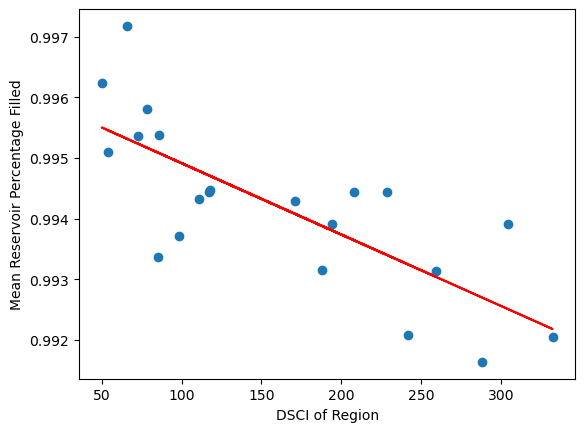

In [47]:
x_values = result["mean"]
y_values = df1["Fred2"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
lin_eq = "y = " + str(round(slope,10)) + "x + " + str(round(intercept,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(lin_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Mean Reservoir Percentage Filled")
plt.xlabel("DSCI of Region")
print(lin_eq)
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

#correlation = st.pearsonr(population_vs_elevation_df["Total Population of Basin Counties"],population_vs_elevation_df["Mean Reservoir Percentage Filled"])
#print(f"The correlation between the population and percentage fill of reservoir: {round(correlation[0],2)}")